# Equatorial Undercurrent

In [1]:
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.collections as mcollections
import matplotlib.colors as colors
import numpy as np
import cmocean
import processing_utils as proc_utils
import cesm2_lens_utils
import analysis_funcs as afuncs
import xesmf as xe
import pop_tools
import cftime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import gaussian_kde

# FOSI

In [97]:
# LENS for regridding purposes
CESMLENS_var = afuncs.LENS_for_regridding() # this is Area

#### FOSI set up
firstyear = 1959
lastyear = 2020
grid = pop_tools.get_grid('POP_gx1v7')
mask = xr.where((grid['REGION_MASK']>0) & (grid['REGION_MASK']<9), 1, np.nan)
fpath = '/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/SMYLE-FOSI/ocn/proc/tseries/month_1/'
fosi_montime_vals = [cftime.DatetimeNoLeap(1958+year, 1+month, 15) for year in range(63) for month in range(12)]

In [100]:
field = 'UVEL'
fname = f'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.pop.h.{field}.030601-036812.nc'
fpath = '/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/SMYLE-FOSI/ocn/proc/tseries/month_1/'
ds_smyle_fosi_var = xr.open_dataset(fpath+fname)
ds_smyle_fosi_var['time'] = fosi_montime_vals
UVEL_FOSI = ds_smyle_fosi_var[field].isel(
        z_t = slice(0,27),
        nlon = slice(120,295),
        nlat=slice(185,188)).isel(time=slice(0, 240)).compute()

# LENS

In [165]:
comp_val = 'ocn'
var_val='UVEL'
ens_memb_index = 49

directory = f'/glade/campaign/cgd/cesm/CESM2-LE/{comp_val}/proc/tseries/month_1/{var_val}/'

ds_var_hist_var, ds_var_fut_var = cesm2_lens_utils.get_ds_var(
    directory, var=var_val, comp=comp_val, index_hist = ens_memb_index)

UVEL_ds = ds_var_hist_var[var_val].sel(
        time=slice('1958-01', '2020-12')).isel(
        z_t = slice(0,27),
        nlon = slice(120,295), nlat=slice(185,188)).isel(time=slice(0, 240))
UVEL = UVEL_ds.compute()

# PLOTTING

In [102]:
depth_array_lens = [17789.362771671138, 17701.38634325639, 17566.123569095045, 17393.913720149994, 17229.54294417893, 17113.266122543915, 17099.2241049467, 17163.508645171856, 17183.089304879883, 17123.490512232962, 17031.50415269238, 16995.608421045814, 16960.58062495017, 16916.205530961808, 16899.35629479993, 16898.5339866589, 16890.625097961434, 16873.906297391284, 16855.083433439504, 16836.336623837902, 16819.192570773674, 16804.33401426953, 16789.525519489176, 16771.202911805864, 16748.78120227195, 16723.962353211267, 16697.204174252875, 16668.32360190764, 16638.400286030148, 16606.149543661882, 16571.50688955113, 16535.8192307252, 16497.554329051938, 16456.82782024431, 16414.84612241767, 16369.802500029346, 16323.61907922522, 16274.013726714003, 16222.215922805364, 16167.846354602394, 16109.993401522495, 16049.853348322937, 15986.30446522046, 15919.923571892281, 15849.376582590767, 15776.70105636992, 15700.234305646862, 15621.275875006793, 15539.183407428849, 15453.830847614361, 15366.98988792038, 15275.611993714643, 15181.17598477818, 15083.829497337743, 14981.944221334164, 14875.930216268429, 14767.475821306067, 14654.599789802694, 14537.724210122256, 14415.591806511893, 14289.196656750612, 14160.083591109083, 14024.263087280695, 13886.227437045647, 13743.399655459367, 13598.970381680512, 13447.9632815425, 13293.208583077288, 13132.808016611065, 12972.137569234936, 12799.80253410355, 12626.201976286404, 12454.370479975527, 12274.041104343154, 12092.662241543752, 11898.359008121872, 11706.630643318475, 11515.79529037559, 11317.021447823097, 11114.272399967267, 10912.671689760098, 10702.178231724642, 10493.101469719859, 10284.232097069245, 10067.889052662551, 9852.249397739917, 9637.951985862135, 9417.587506954442, 9204.888234515343, 8981.140260272217, 8770.242195369914, 8554.88335685416, 8347.519129272156, 8133.396067383759, 7922.961890539604, 7711.138312732172, 7515.994496210777, 7317.243592685338, 7127.518975279742, 6938.827708425728, 6751.0620426496, 6576.399020374578, 6405.0480328408985, 6232.950335425124, 6073.1372096068035, 5919.435886494735, 5786.949690988215, 5649.877875099506, 5539.843297135235, 5429.8964684677385, 5336.7556551572, 5237.592693373112, 5176.205130632138, 5031.694041134714, 4793.76703011523, 4795.897636084995, 4986.992219544471, 4959.300259807436, 4919.154952176306, 4931.862780002624, 4983.158558384578, 5055.610309238453, 5162.049150236948, 5324.379054592556]
lons_lens = [140.56250391150786, 141.68750394281383, 142.8125039741198, 143.93750400542578, 145.06250403673175, 146.18750406803773, 147.3125040993437, 148.4375041306497, 149.56250416195567, 150.68750419326165, 151.81250422456762, 152.9375042558736, 154.06250428717956, 155.18750431848554, 156.31250434979154, 157.4375043810975, 158.56250441240348, 159.68750444370946, 160.81250447501543, 161.9375045063214, 163.06250453762738, 164.18750456893338, 165.31250460023935, 166.43750463154532, 167.5625046628513, 168.68750469415727, 169.81250472546324, 170.93750475676921, 172.06250478807522, 173.1875048193812, 174.31250485068716, 175.43750488199314, 176.5625049132991, 177.68750494460508, 178.81250497591105, 179.93750500721706, 181.062505038523, 182.18750506982897, 183.31250510113495, 184.43750513244092, 185.5625051637469, 186.6875051950529, 187.81250522635887, 188.93750525766484, 190.0625052889708, 191.18750532027678, 192.31250535158276, 193.43750538288876, 194.56250541419473, 195.68750544550073, 196.81250547680668, 197.93750550811265, 199.06250553941862, 200.1875055707246, 201.3125056020306, 202.4375056333366, 203.56250566464254, 204.68750569594854, 205.8125057272545, 206.93750575856046, 208.06250578986644, 209.18750582117244, 210.31250585247844, 211.43750588378438, 212.56250591509036, 213.68750594639636, 214.8125059777023, 215.93750600900827, 217.06250604031428, 218.18750607162025, 219.31250610292625, 220.43750613423222, 221.5625061655382, 222.68750619684414, 223.8125062281501, 224.93750625945611, 226.0625062907621, 227.1875063220681, 228.31250635337403, 229.43750638468003, 230.562506415986, 231.68750644729198, 232.81250647859798, 233.93750650990395, 235.06250654120993, 236.1875065725159, 237.31250660382187, 238.43750663512785, 239.56250666643382, 240.68750669773982, 241.8125067290458, 242.93750676035177, 244.06250679165774, 245.1875068229637, 246.31250685426969, 247.43750688557566, 248.56250691688166, 249.68750694818763, 250.8125069794936, 251.93750701079958, 253.06250704210555, 254.18750707341152, 255.3125071047175, 256.4375071360235, 257.56250716732944, 258.68750719863544, 259.81250722994145, 260.9375072612474, 262.0625072925534, 263.18750732385934, 264.31250735516534, 265.4375073864713, 266.5625074177773, 267.6875074490833, 268.81250748038923, 269.93750751169523, 271.0625075430012, 272.1875075743072, 273.3125076056131, 274.4375076369191, 275.5625076682251, 276.68750769953107, 277.81250773083707, 278.937507762143]

lons_fosi = [140.56250391150786, 141.68750394281383, 142.8125039741198, 143.93750400542578, 145.06250403673175, 146.18750406803773, 147.3125040993437, 148.4375041306497, 149.56250416195567, 150.68750419326165, 151.81250422456762, 152.9375042558736, 154.06250428717956, 155.18750431848554, 156.31250434979154, 157.4375043810975, 158.56250441240348, 159.68750444370946, 160.81250447501543, 161.9375045063214, 163.06250453762738, 164.18750456893338, 165.31250460023935, 166.43750463154532, 167.5625046628513, 168.68750469415727, 169.81250472546324, 170.93750475676921, 172.06250478807522, 173.1875048193812, 174.31250485068716, 175.43750488199314, 176.5625049132991, 177.68750494460508, 178.81250497591105, 179.93750500721706, 181.062505038523, 182.18750506982897, 183.31250510113495, 184.43750513244092, 185.5625051637469, 186.6875051950529, 187.81250522635887, 188.93750525766484, 190.0625052889708, 191.18750532027678, 192.3125053515828, 193.43750538288876, 194.56250541419473, 195.68750544550073, 196.81250547680668, 197.93750550811265, 199.06250553941862, 200.1875055707246, 201.3125056020306, 202.4375056333366, 203.56250566464254, 204.68750569594854, 205.8125057272545, 206.93750575856046, 208.06250578986644, 209.18750582117244, 210.31250585247844, 211.43750588378438, 212.56250591509036, 213.68750594639636, 214.8125059777023, 215.93750600900827, 217.06250604031428, 218.18750607162025, 219.31250610292625, 220.43750613423222, 221.5625061655382, 222.68750619684414, 223.8125062281501, 224.93750625945611, 226.0625062907621, 227.18750632206806, 228.31250635337403, 229.43750638468003, 230.562506415986, 231.68750644729198, 232.81250647859798, 233.93750650990395, 235.06250654120993, 236.1875065725159, 237.31250660382187, 238.43750663512785, 239.56250666643382, 240.68750669773982, 241.8125067290458, 242.93750676035177, 244.06250679165774, 245.1875068229637, 246.31250685426969, 247.43750688557566, 248.56250691688166, 249.68750694818763, 250.8125069794936, 251.93750701079958, 253.06250704210555, 254.18750707341152, 255.3125071047175, 256.4375071360235, 257.56250716732944, 258.68750719863544, 259.81250722994145, 260.9375072612474, 262.0625072925534, 263.18750732385934, 264.31250735516534, 265.4375073864713, 266.5625074177773, 267.6875074490833, 268.81250748038923, 269.93750751169523, 271.0625075430012, 272.1875075743072, 273.3125076056131, 274.4375076369191, 275.5625076682251, 276.68750769953107, 277.81250773083707, 278.937507762143]
depth_array_fosi = [18291.69907869359, 18242.83482882235, 18114.866813380635, 17898.18237071001, 17640.554201669125, 17431.229914956257, 17363.636121788822, 17407.20559762794, 17390.722394519336, 17296.74476868623, 17174.482637010617, 17149.53348891504, 17168.654992247943, 17180.589403903, 17200.522059161845, 17217.218023331243, 17204.048371047917, 17163.439259861054, 17123.011382648383, 17098.50324355691, 17087.638511087433, 17080.217310469212, 17069.92090078294, 17052.758994161115, 17028.540510070477, 17000.25368108382, 16969.354575717254, 16937.775706450604, 16905.542269691883, 16870.482840908986, 16833.017148312443, 16792.8983307547, 16749.33978784947, 16702.795075859056, 16653.84533814568, 16601.099731416223, 16543.987609126863, 16483.582388847575, 16419.78280597058, 16352.0179510627, 16280.621591226887, 16206.763498989732, 16131.367668014323, 16052.242382731776, 15969.939829222394, 15883.960766245365, 15793.8288474344, 15700.0262126678, 15601.400222666138, 15497.92657772884, 15390.943357126725, 15279.64652596148, 15164.403828470417, 15045.189362880914, 14922.405878639316, 14794.409383611788, 14660.201557736642, 14522.813155398495, 14380.899455928437, 14234.061430542197, 14083.339257184518, 13933.512981572987, 13781.321059221471, 13624.640691856772, 13465.930422267842, 13300.975405922161, 13137.394379604017, 12967.010239979872, 12791.689026573798, 12615.014341587974, 12435.995245629107, 12256.823944449528, 12077.56768926381, 11895.803025308373, 11714.804102177119, 11530.061998919029, 11339.13865144044, 11150.82557322146, 10958.573632359996, 10768.67033703496, 10579.041643536464, 10392.683541471846, 10199.621511096342, 10010.526869366584, 9822.925276180467, 9634.473834972156, 9444.347207319333, 9251.870037116343, 9059.504108633279, 8871.96619164751, 8682.512614011002, 8502.102273046203, 8318.146398078541, 8149.154405711609, 7971.571146827001, 7809.22410175491, 7634.575217409085, 7472.7915587113475, 7316.287793998056, 7163.931060573051, 7012.134925653768, 6877.188234959844, 6730.091755807167, 6607.906018878991, 6461.290850234716, 6332.514001133509, 6214.391969410131, 6092.369993365461, 5994.642990440025, 5876.727124698508, 5779.247453957066, 5663.790328585504, 5562.30805263055, 5428.440145592694, 5255.73074536742, 5167.387817061854, 5383.72528771256, 5308.710918349109, 5229.280696412716, 5196.927660188645, 5218.47921322444, 5264.6727547731125, 5361.059255371503, 5515.319301799851]


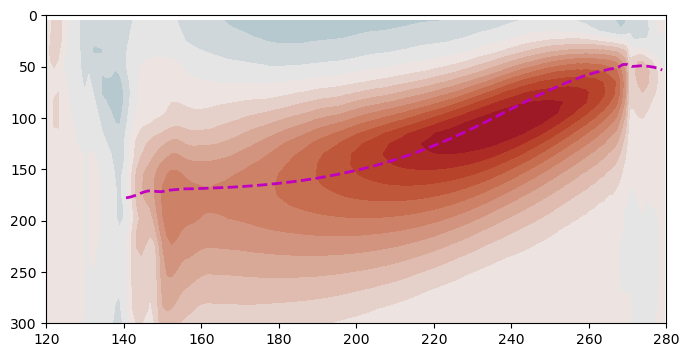

In [162]:
plt.figure(figsize=(8,4))
plt.contourf(
    UVEL.isel(nlat=1).ULONG, UVEL.isel(nlat=1).z_t/100, 
    UVEL.isel(nlat=1).mean(dim='time'), yincrease=False, levels=np.arange(-150, 160,10),
    cmap=cmocean.cm.balance)
plt.ylim(300, 0)
plt.xlim(120, 280)
plt.plot(lons_lens, np.asarray(depth_array_lens)/100, c='m', linestyle='dashed', linewidth=2)
plt.show()

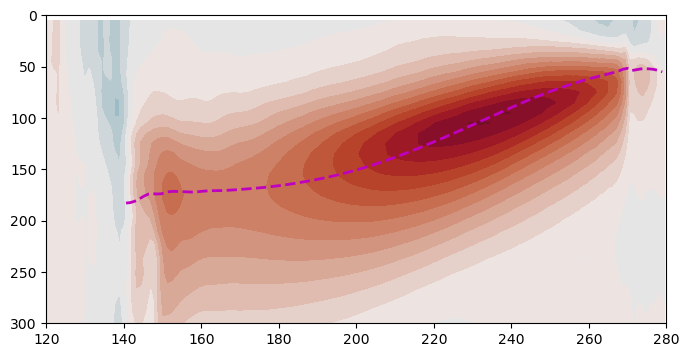

In [163]:
plt.figure(figsize=(8,4))
plt.contourf(
    UVEL_FOSI.isel(nlat=1).ULONG, 
    UVEL_FOSI.isel(nlat=1).z_t/100, 
    UVEL_FOSI.isel(nlat=1).mean(dim='time'), yincrease=False, 
    levels=np.arange(-150, 160,10),cmap=cmocean.cm.balance)
plt.ylim(300, 0)
plt.xlim(120, 280)
plt.plot(lons_fosi, np.asarray(depth_array_fosi)/100, c='m', linestyle='dashed', linewidth=2)
plt.show()

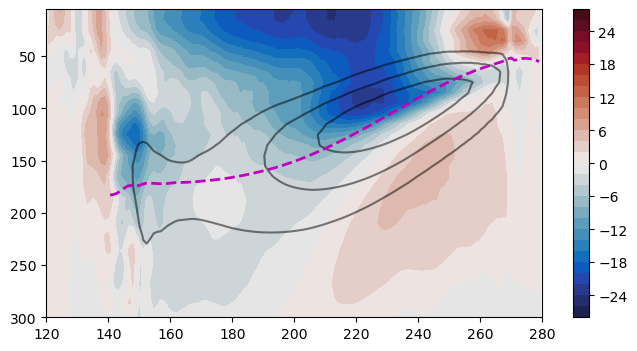

In [164]:
plt.figure(figsize=(8,4))
im = plt.contourf(
    UVEL_FOSI.isel(nlat=1).ULONG, 
    UVEL_FOSI.isel(nlat=1).z_t/100, 
    (UVEL.isel(nlat=1).mean(dim='time') - UVEL_FOSI.isel(nlat=1).mean(dim='time')), 
    yincrease=False, levels=np.arange(-28, 30, 2),
    cmap=cmocean.cm.balance)
plt.contour(
    UVEL_FOSI.isel(nlat=1).ULONG, 
    UVEL_FOSI.isel(nlat=1).z_t/100, 
    UVEL_FOSI.isel(nlat=1).mean(dim='time'), yincrease=False, 
    levels=np.arange(50, 125,25),colors='k', alpha=0.5)

plt.ylim(300, 5)
plt.xlim(120, 280)
plt.colorbar(im)
plt.plot(lons_fosi, np.asarray(depth_array_fosi)/100, c='m', linestyle='dashed', linewidth=2)
plt.show()

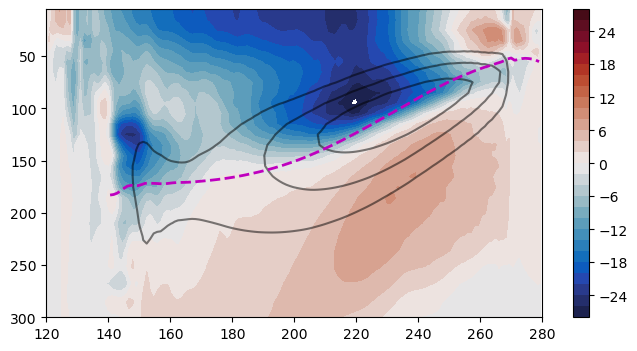

In [166]:
plt.figure(figsize=(8,4))
im = plt.contourf(
    UVEL_FOSI.isel(nlat=1).ULONG, 
    UVEL_FOSI.isel(nlat=1).z_t/100, 
    (UVEL.isel(nlat=1).mean(dim='time') - UVEL_FOSI.isel(nlat=1).mean(dim='time')), 
    yincrease=False, levels=np.arange(-28, 30, 2),
    cmap=cmocean.cm.balance)
plt.contour(
    UVEL_FOSI.isel(nlat=1).ULONG, 
    UVEL_FOSI.isel(nlat=1).z_t/100, 
    UVEL_FOSI.isel(nlat=1).mean(dim='time'), yincrease=False, 
    levels=np.arange(50, 125,25),colors='k', alpha=0.5)

plt.ylim(300, 5)
plt.xlim(120, 280)
plt.colorbar(im)
plt.plot(lons_fosi, np.asarray(depth_array_fosi)/100, c='m', linestyle='dashed', linewidth=2)
plt.show()